In [1]:
import sys
import os

import numpy as np
import pandas as pd
#import holoviews as hv
#import networkx as nx
#import bokeh
#from holoviews import opts
import matplotlib.pyplot as plt

#hv.extension('bokeh')

sys.path.append('../../')
os.chdir("../../")

import configparser
import logging
import pathlib
import networkx as nx

from src.features.dataloader import DataLoader
from src.models.networkx_graph import SurfaceModel
from configuration.basic_configuration import configuration

base_path = configuration['PATHS']['interim_data_dir'].format("test") if configuration['PARAMETERS']['dataset'] == 'test' \
            else configuration['PATHS']['interim_data_dir'].format("model")  # absolute or relative path to directory where data is stored

logging.debug(f"base_path: {base_path}")

encoding = "iso-8859-1"

In [2]:
logging.basicConfig(format='%(asctime)s - %(levelname)s: %(message)s', level=logging.INFO,
                    datefmt='%d.%m.%Y %H:%M:%S')
#####################################

#####################################
# Initiate data loader
# logging.info("Initiating data_loader")

# --> Load all data:
# loader = DataLoader(hdfs_pipe=False)  # hdfs_pipe = False --> files will be loaded directly from CSV
# patient_data = loader.patient_data()
#####################################

In [3]:
movements_df = pd.read_csv(os.path.join(base_path, "LA_ISH_NBEW.csv"), encoding=encoding, parse_dates=["Begin Datetime", "End Datetime"], index_col="Serial Number")

# movements_df["Begin Time"] = movements_df["Begin Time"].str[:8]
# movements_df["End Time"] = movements_df["End Time"].str[:8]
#
# #movements_df["Begin Date"] = pd.to_datetime(movements_df["Begin Date"], format="%Y-%m-%d", errors="ignore")
# #movements_df["End Date"] = pd.to_datetime(movements_df["End Date"], format="%Y-%m-%d", errors="ignore")
#
# movements_df["Begin Datetime"] = (movements_df["Begin Date"] + " " + movements_df["Begin Time"])
# movements_df["End Datetime"] = (movements_df["End Date"] + " " + movements_df["End Time"])
# movements_df = movements_df.drop(labels=["Begin Date", "Begin Time", "End Date", "End Time"], axis=1)
#
# movements_df["Begin Datetime"] = pd.to_datetime(movements_df["Begin Datetime"], format="%Y-%m-%d %H:%M:%S", errors='coerce')
# movements_df["End Datetime"] = pd.to_datetime(movements_df["End Datetime"], format="%Y-%m-%d %H:%M:%S", errors='coerce')

#movements_df = movements_df.reset_index()
len(movements_df)

/home/benelot/miniconda3/envs/vre-spark/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1276690

In [4]:
movements_df["Begin Datetime"].apply(lambda x: type(x)).unique()
movements_df["End Datetime"].apply(lambda x: type(x)).unique()

#pd.to_datetime(pd.DataFrame(data={"d":["1677-12-31"]})["d"], format="%Y-%m-%d")
#movements_df.sort_values("End Datetime")

array([<class 'pandas._libs.tslibs.timestamps.Timestamp'>,
       <class 'pandas._libs.tslibs.nattype.NaTType'>], dtype=object)

In [5]:
movements_df

,Case ID,Movement Type ID,Movement Type,Status,Serial Reference,Description,Department,Ward,Organisational Unit of Entry,Room ID,Bed ID,Is Cancelled,Partner ID,Begin Datetime,End Datetime
Serial Number,,,,,,,,,,,,,,,
3,5729661,4,SB,30.0,0,NaN,71KARA,71KARA,NaN,NaN,NaN,NaN,NaN,2017-01-04 15:30:00,2017-01-04 15:30:00
4,5729661,4,SB,30.0,0,NaN,71WUNA,71WUNA,NaN,NaN,NaN,NaN,NaN,2017-01-17 10:00:00,2017-01-17 10:00:00
5,5729661,4,SB,30.0,0,NaN,71NOTC,71NOTC,71AUFN,NaN,NaN,NaN,10101818.0,2017-01-23 11:37:28,2017-01-23 11:37:28
6,5729661,4,SB,30.0,0,NaN,71VCHA,71VCHA,NaN,NaN,NaN,NaN,NaN,2017-01-23 11:00:00,2017-01-23 11:00:00
7,5729661,2,EI,NaN,7,NaN,71AIMS,71MITTE2,NaN,00071230,71230F,NaN,NaN,2017-01-25 09:15:00,2017-01-25 09:15:00
8,5729661,3,WA,NaN,9,NaN,71IPSS,71IPS,NaN,71IPS04,NaN,NaN,NaN,2017-01-18 20:00:00,2017-01-18 22:00:00
9,5729661,3,WA,NaN,7,NaN,71AIMS,71MITTE2,NaN,00071230,71230F,NaN,NaN,2017-01-18 22:00:00,2017-01-25 09:15:00
10,5729661,3,WA,NaN,11,NaN,71IPSS,71IPS,NaN,71IPS01,71IPS01E,NaN,NaN,2017-01-07 15:30:00,2017-01-07 18:45:00
11,5729661,3,WA,NaN,8,NaN,71AIMS,71MITTE2,NaN,00071230,71230T,NaN,NaN,2017-01-07 18:45:00,2017-01-18 20:00:00


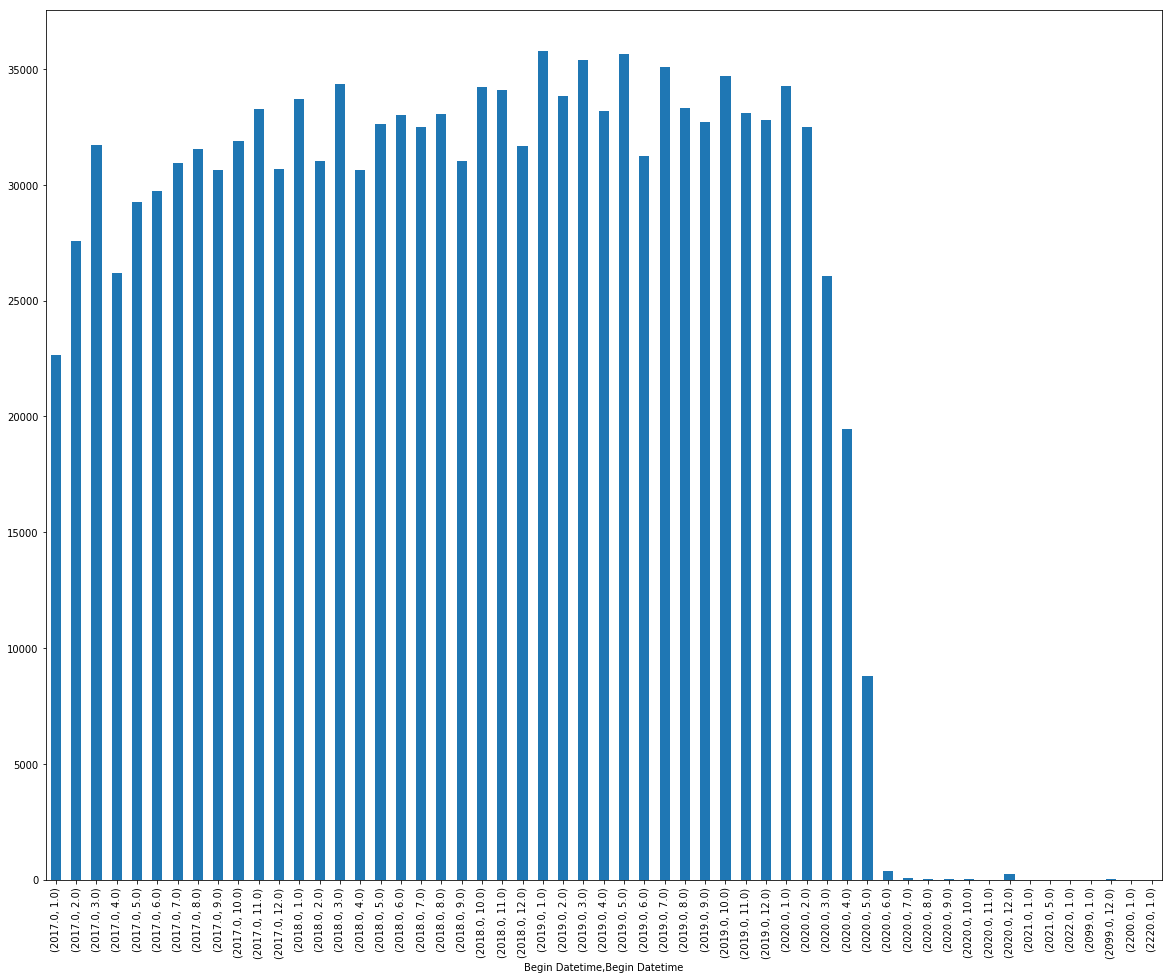

In [6]:
movements_df["Begin Datetime"].groupby([movements_df["Begin Datetime"].dt.year, movements_df["Begin Datetime"].dt.month]).count().plot(kind="bar", figsize=(20,16))

In [7]:
case_df = pd.read_csv(os.path.join(base_path, "DIM_FALL.csv"), encoding=encoding)
case_df = case_df.set_index("Case ID")  # string case ID
case_df

/home/benelot/miniconda3/envs/vre-spark/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Patient ID,Case Type ID,Case Status,Case Type,Start Date,End Date,Patient Type,Patient Status
Case ID,,,,,,,,
5752785,13831402,2,closed,ambulatory,2017-01-12,2017-01-13,Standard Patient,active
5752786,13719092,2,closed,ambulatory,2017-01-12,2017-01-13,Standard Patient,active
5752787,82907641,2,open,ambulatory,2017-01-12,1753-01-01,Standard Patient,active
5752788,13320793,1,closed,in-patient,2017-01-12,1753-01-01,Standard Patient,active
5752789,9879676,2,closed,ambulatory,2017-01-12,2017-01-13,Standard Patient,active
5752790,12553395,1,closed,in-patient,2017-01-12,1753-01-01,Standard Patient,active
5752791,6416730,2,closed,ambulatory,2017-01-12,2017-01-13,Standard Patient,active
5752792,3100863,2,closed,ambulatory,2017-01-12,2017-01-13,Standard Patient,active
5752793,4914066,2,closed,ambulatory,2017-01-12,2017-01-13,Standard Patient,active


In [8]:
movements_with_cases_df = movements_df.join(case_df[["Case Status", "Patient ID"]], on="Case ID", how="left")

#movements_with_cases_df[movements_with_cases_df["Case Status"].apply(lambda x: not isinstance(x, str))]

In [9]:
patient_df = pd.read_csv(os.path.join(base_path, "DIM_PATIENT.csv"), encoding=encoding, dtype=str)
patient_df = patient_df.set_index("Patient ID")  # string patient ID
patient_df
#patient_df[patient_df["Gender"].apply(lambda x: not isinstance(x, str))]

,Gender,Birth Date,Zip Code,Place of Residence,Canton,Language
Patient ID,,,,,,
00000000167,male,1972-10-12,3012,Bern,BE,Deutsch
00000000353,male,1978-12-11,3027,Bern,BE,Deutsch
00000000507,female,1971-12-31,1797,MÃ¼nchenwiler,BE,Deutsch
00000000647,male,1980-01-08,3270,Aarberg,BE,Deutsch
00000000663,female,1978-06-30,3144,Gasel,BE,Deutsch
00000000671,male,1970-05-24,3612,Steffisburg,BE,Deutsch
00000000752,male,1972-07-11,3250,Lyss,BE,Deutsch
00000000914,female,1978-06-16,3063,Ittigen,BE,Deutsch
00000000957,male,1980-05-09,3084,Wabern,BE,Deutsch


In [10]:
movements_with_patients_df = movements_with_cases_df[movements_with_cases_df["Patient ID"].isin(patient_df.index)]

In [11]:
movements_with_patients_df

,Case ID,Movement Type ID,Movement Type,Status,Serial Reference,Description,Department,Ward,Organisational Unit of Entry,Room ID,Bed ID,Is Cancelled,Partner ID,Begin Datetime,End Datetime,Case Status,Patient ID
Serial Number,,,,,,,,,,,,,,,,,
1,5856333,4,BU,30.0,0,NaN,NOTC,NOTC,NERW,NaN,NaN,NaN,NaN,2017-03-21 11:13:21,2017-03-21 14:15:00,closed,00004150910
2,5856333,1,AU,NaN,3,NaN,VMCK,H SUED 2,NERW,BH H 115,BHH115T,NaN,NaN,2017-03-21 14:15:00,2017-03-22 14:50:00,closed,00004150910
3,5856333,3,WA,NaN,4,NaN,IMCI,E108-09,NaN,BH E 109,BHE109_4,NaN,NaN,2017-03-22 14:50:00,2017-03-23 10:43:08,closed,00004150910
4,5856333,3,WA,NaN,5,NaN,VMCK,H SUED 2,NaN,BH H 115,BHH115T,NaN,NaN,2017-03-23 10:43:08,2017-03-29 11:30:00,closed,00004150910
5,5856333,2,EN,NaN,5,NaN,VMCK,H SUED 2,NaN,BH H 115,BHH115T,NaN,NaN,2017-03-29 11:30:00,2017-03-29 11:30:00,closed,00004150910
1,5856342,1,AK,NaN,2,NaN,AUGK,OST 2,AVOR,AK2. 222,AK2 222C,NaN,NaN,2017-05-23 09:30:00,2017-05-25 10:15:03,closed,00010153535
2,5856342,2,EN,NaN,2,NaN,AUGK,OST 2,NaN,AK2. 222,AK2 222C,NaN,NaN,2017-05-25 10:15:03,2017-05-25 10:15:03,closed,00010153535
3,5856342,4,SB,30.0,0,NaN,AUGP,AUGP,AVOR,NaN,NaN,NaN,NaN,2017-05-24 09:30:00,2017-05-24 09:30:00,closed,00010153535
4,5856342,4,SB,30.0,0,bakp,NEPH,NEPH,NaN,AKUT,NaN,NaN,NaN,2017-05-24 13:30:00,2017-05-24 13:30:00,closed,00010153535


In [12]:
vre_screening_data = pd.read_csv(os.path.join(base_path, "VRE_SCREENING_DATA.csv"), encoding=encoding, index_col="Order ID", dtype=str)
vre_screening_data

,Record Date,Measurement Date,First Name,Last Name,Birth Date,Patient ID,Requester,Cost Unit,Material Type,Transport,Result,Analysis Method,Screening Context
Order ID,,,,,,,,,,,,,
2803033,2017-12-30,2017-12-29,Roland,Streiff,1965-10-04,00013253506,sepi,sepi,are,tmpo,nn,Kolonie,NaN
2803034,2017-12-30,2017-12-29,Roland,Streiff,1965-10-04,00013253506,sepi,sepi,a,tmpo,nn,Kolonie,Klinisch
2803035,2017-12-30,2017-12-29,Roland,RÃ¼fenacht,1956-01-18,00006240593,sepi,sepi,are,tmpo,nn,Kolonie,NaN
2803036,2017-12-30,2017-12-29,Pia,Petrick Ibele,1949-04-11,00011897031,sepi,sepi,are,tmpo,nn,Kolonie,NaN
2803037,2017-12-30,2017-12-29,Roland,Steffen,1963-03-27,00014303736,sepi,sepi,a?,tmpo,nn,Kolonie,Klinisch
2803038,2017-12-30,2017-12-29,Eloina,Perez Castaedo,1944-03-13,0005040779,sepi,sepi,a?,tmpo,nn,Kolonie,Klinisch
2803039,2017-12-30,2017-12-29,Kurt,Roten,1935-02-27,00014404079,sepi,sepi,are,tmpo,efam,Kolonie,NaN
2803040,2017-12-30,2017-12-29,Rosmarie,Maurer,1953-01-22,00007420510,sepi,sepi,a?,tmpo,efam,Kolonie,Klinisch
2803041,2017-12-30,2017-12-29,Beatrice,Jaussi Chtaiki,1948-08-16,00082310750,sepi,sepi,a?,tmpo,nn,Kolonie,Klinisch


In [13]:
vre_screening_with_patient = vre_screening_data[vre_screening_data["Patient ID"].isin(patient_df.index)]
vre_screening_with_patient

,Record Date,Measurement Date,First Name,Last Name,Birth Date,Patient ID,Requester,Cost Unit,Material Type,Transport,Result,Analysis Method,Screening Context
Order ID,,,,,,,,,,,,,
2803033,2017-12-30,2017-12-29,Roland,Streiff,1965-10-04,00013253506,sepi,sepi,are,tmpo,nn,Kolonie,NaN
2803034,2017-12-30,2017-12-29,Roland,Streiff,1965-10-04,00013253506,sepi,sepi,a,tmpo,nn,Kolonie,Klinisch
2803035,2017-12-30,2017-12-29,Roland,RÃ¼fenacht,1956-01-18,00006240593,sepi,sepi,are,tmpo,nn,Kolonie,NaN
2803036,2017-12-30,2017-12-29,Pia,Petrick Ibele,1949-04-11,00011897031,sepi,sepi,are,tmpo,nn,Kolonie,NaN
2803037,2017-12-30,2017-12-29,Roland,Steffen,1963-03-27,00014303736,sepi,sepi,a?,tmpo,nn,Kolonie,Klinisch
2803039,2017-12-30,2017-12-29,Kurt,Roten,1935-02-27,00014404079,sepi,sepi,are,tmpo,efam,Kolonie,NaN
2803040,2017-12-30,2017-12-29,Rosmarie,Maurer,1953-01-22,00007420510,sepi,sepi,a?,tmpo,efam,Kolonie,Klinisch
2803041,2017-12-30,2017-12-29,Beatrice,Jaussi Chtaiki,1948-08-16,00082310750,sepi,sepi,a?,tmpo,nn,Kolonie,Klinisch
2803042,2017-12-30,2017-12-29,GÃ©rard,Berger,1948-10-22,00014401584,sepi,sepi,are,tmpo,nn,Kolonie,NaN


In [14]:
vre_screening_with_case = vre_screening_data[vre_screening_data["Patient ID"].isin(set(case_df["Patient ID"].to_list()))]
vre_screening_with_case

,Record Date,Measurement Date,First Name,Last Name,Birth Date,Patient ID,Requester,Cost Unit,Material Type,Transport,Result,Analysis Method,Screening Context
Order ID,,,,,,,,,,,,,
2803035,2017-12-30,2017-12-29,Roland,RÃ¼fenacht,1956-01-18,00006240593,sepi,sepi,are,tmpo,nn,Kolonie,NaN
2803037,2017-12-30,2017-12-29,Roland,Steffen,1963-03-27,00014303736,sepi,sepi,a?,tmpo,nn,Kolonie,Klinisch
2803039,2017-12-30,2017-12-29,Kurt,Roten,1935-02-27,00014404079,sepi,sepi,are,tmpo,efam,Kolonie,NaN
2803040,2017-12-30,2017-12-29,Rosmarie,Maurer,1953-01-22,00007420510,sepi,sepi,a?,tmpo,efam,Kolonie,Klinisch
2803041,2017-12-30,2017-12-29,Beatrice,Jaussi Chtaiki,1948-08-16,00082310750,sepi,sepi,a?,tmpo,nn,Kolonie,Klinisch
2803114,2017-12-31,2017-12-29,Christophe,Tivollier,1969-11-12,00011739495,sepi,sepi,are,tmpo,efam,Kolonie,NaN
2803115,2017-12-31,2017-12-29,Urs,Bitzi,1949-02-20,00002477068,sepi,sepi,aw,tmpo,nn,Kolonie,Klinisch
2803118,2017-12-31,2017-12-29,Caroline,Kocher,1954-05-01,00014244241,sepi,sepi,u,uck,nn,Kolonie,Klinisch
2803119,2017-12-31,2017-12-29,Caroline,Kocher,1954-05-01,00014244241,sepi,sepi,are,tmpo,nn,Kolonie,NaN


In [17]:
def has_stays_at_date(patient_id, target_date):
    return len(movements_with_patients_df[movements_with_patients_df["Patient ID"].str.match(patient_id) & movements_with_patients_df["Begin Datetime"] < target_date & target_date < movements_with_patients_df["End Datetime"]]) > 0

has_valid_stay = vre_screening_data[["Patient ID", "Record Date"]].apply(lambda params: has_stays_at_date(params[0], params[1]))

vre_screening_with_patient_movement = vre_screening_data[vre_screening_data["Patient ID"].isin(patient_df.index) & has_valid_stay]

KeyError: (0, 'occurred at index Patient ID')